# Visualization

In [1]:
from sklearn.manifold import TSNE
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from wordcloud import WordCloud
import numpy as np
import pandas as pd
import os

In [2]:
data_file_path = os.path.abspath(os.path.join(os.pardir,'data','tf_idf_training_data.csv'))
tf_idf = pd.read_csv(data_file_path)
tf_idf.head()

News Category  access  according  accused  acquisition  across  action  \
0      business     0.0        0.0      0.0          0.0     0.0     0.0   
1      business     0.0        0.0      0.0          0.0     0.0     0.0   
2      business     0.0        0.0      0.0          0.0     0.0     0.0   
3      business     0.0        0.0      0.0          0.0     0.0     0.0   
4      business     0.0        0.0      0.0          0.0     0.0     0.0   

   activity   ad  add  ...  yahoo  yankee  yard  yasser  year  yesterday  yet  \
0       0.0  0.0  0.0  ...    0.0     0.0   0.0     0.0   0.0        0.0  0.0   
1       0.0  0.0  0.0  ...    0.0     0.0   0.0     0.0   0.0        0.0  0.0   
2       0.0  0.0  0.0  ...    0.0     0.0   0.0     0.0   0.0        0.0  0.0   
3       0.0  0.0  0.0  ...    0.0     0.0   0.0     0.0   0.0        0.0  0.0   
4       0.0  0.0  0.0  ...    0.0     0.0   0.0     0.0   0.0        0.0  0.0   

   york  young  yukos  
0   0.0    0.0    0.0  
1   0.0    0.0    0.0  
2   0.0    0.0    0.0  
3   0.0    0.0    0.0  
4   0.0    0.0    0.0  

[5 rows x 1001 columns]

# Word Cloud

In [20]:
news_category_tfidf = tf_idf.groupby('News Category')

In [21]:
#creates dict of pd series with top 200 most frequent words by news category
top_n = 200
freq_by_cat = {}
news_categories = []
for name, group in news_category_tfidf:
    news_categories.append(name)
    freq_by_cat[name] = news_category_tfidf.get_group(name).sum().drop('News Category').astype(int).nlargest(n = top_n)

In [22]:
freq_by_cat

{'business': oil           1147
 reuters       1095
 stock         1019
 price          970
 company        912
               ... 
 september      168
 debt           166
 post           166
 production     166
 wireless       165
 Length: 200, dtype: int64, 'science_and_technology': microsoft    1082
 new          1010
 two           899
 software      783
 internet      734
              ... 
 center        153
 drive         153
 share         153
 used          153
 friday        151
 Length: 200, dtype: int64, 'sports': one              1454
 two              1266
 game             1173
 ap               1132
 three             954
                  ... 
 bay               160
 chance            159
 international     159
 come              158
 deal              158
 Length: 200, dtype: int64, 'world': iraq          1132
 ap             966
 said           965
 president      855
 reuters        780
               ... 
 power          155
 head           153
 island         153


In [23]:
#title dimension for pyplot
title_dic = {'fontsize': 250,
 'fontweight' : 5,
 'verticalalignment': 'baseline',
 'horizontalalignment': 'center'}

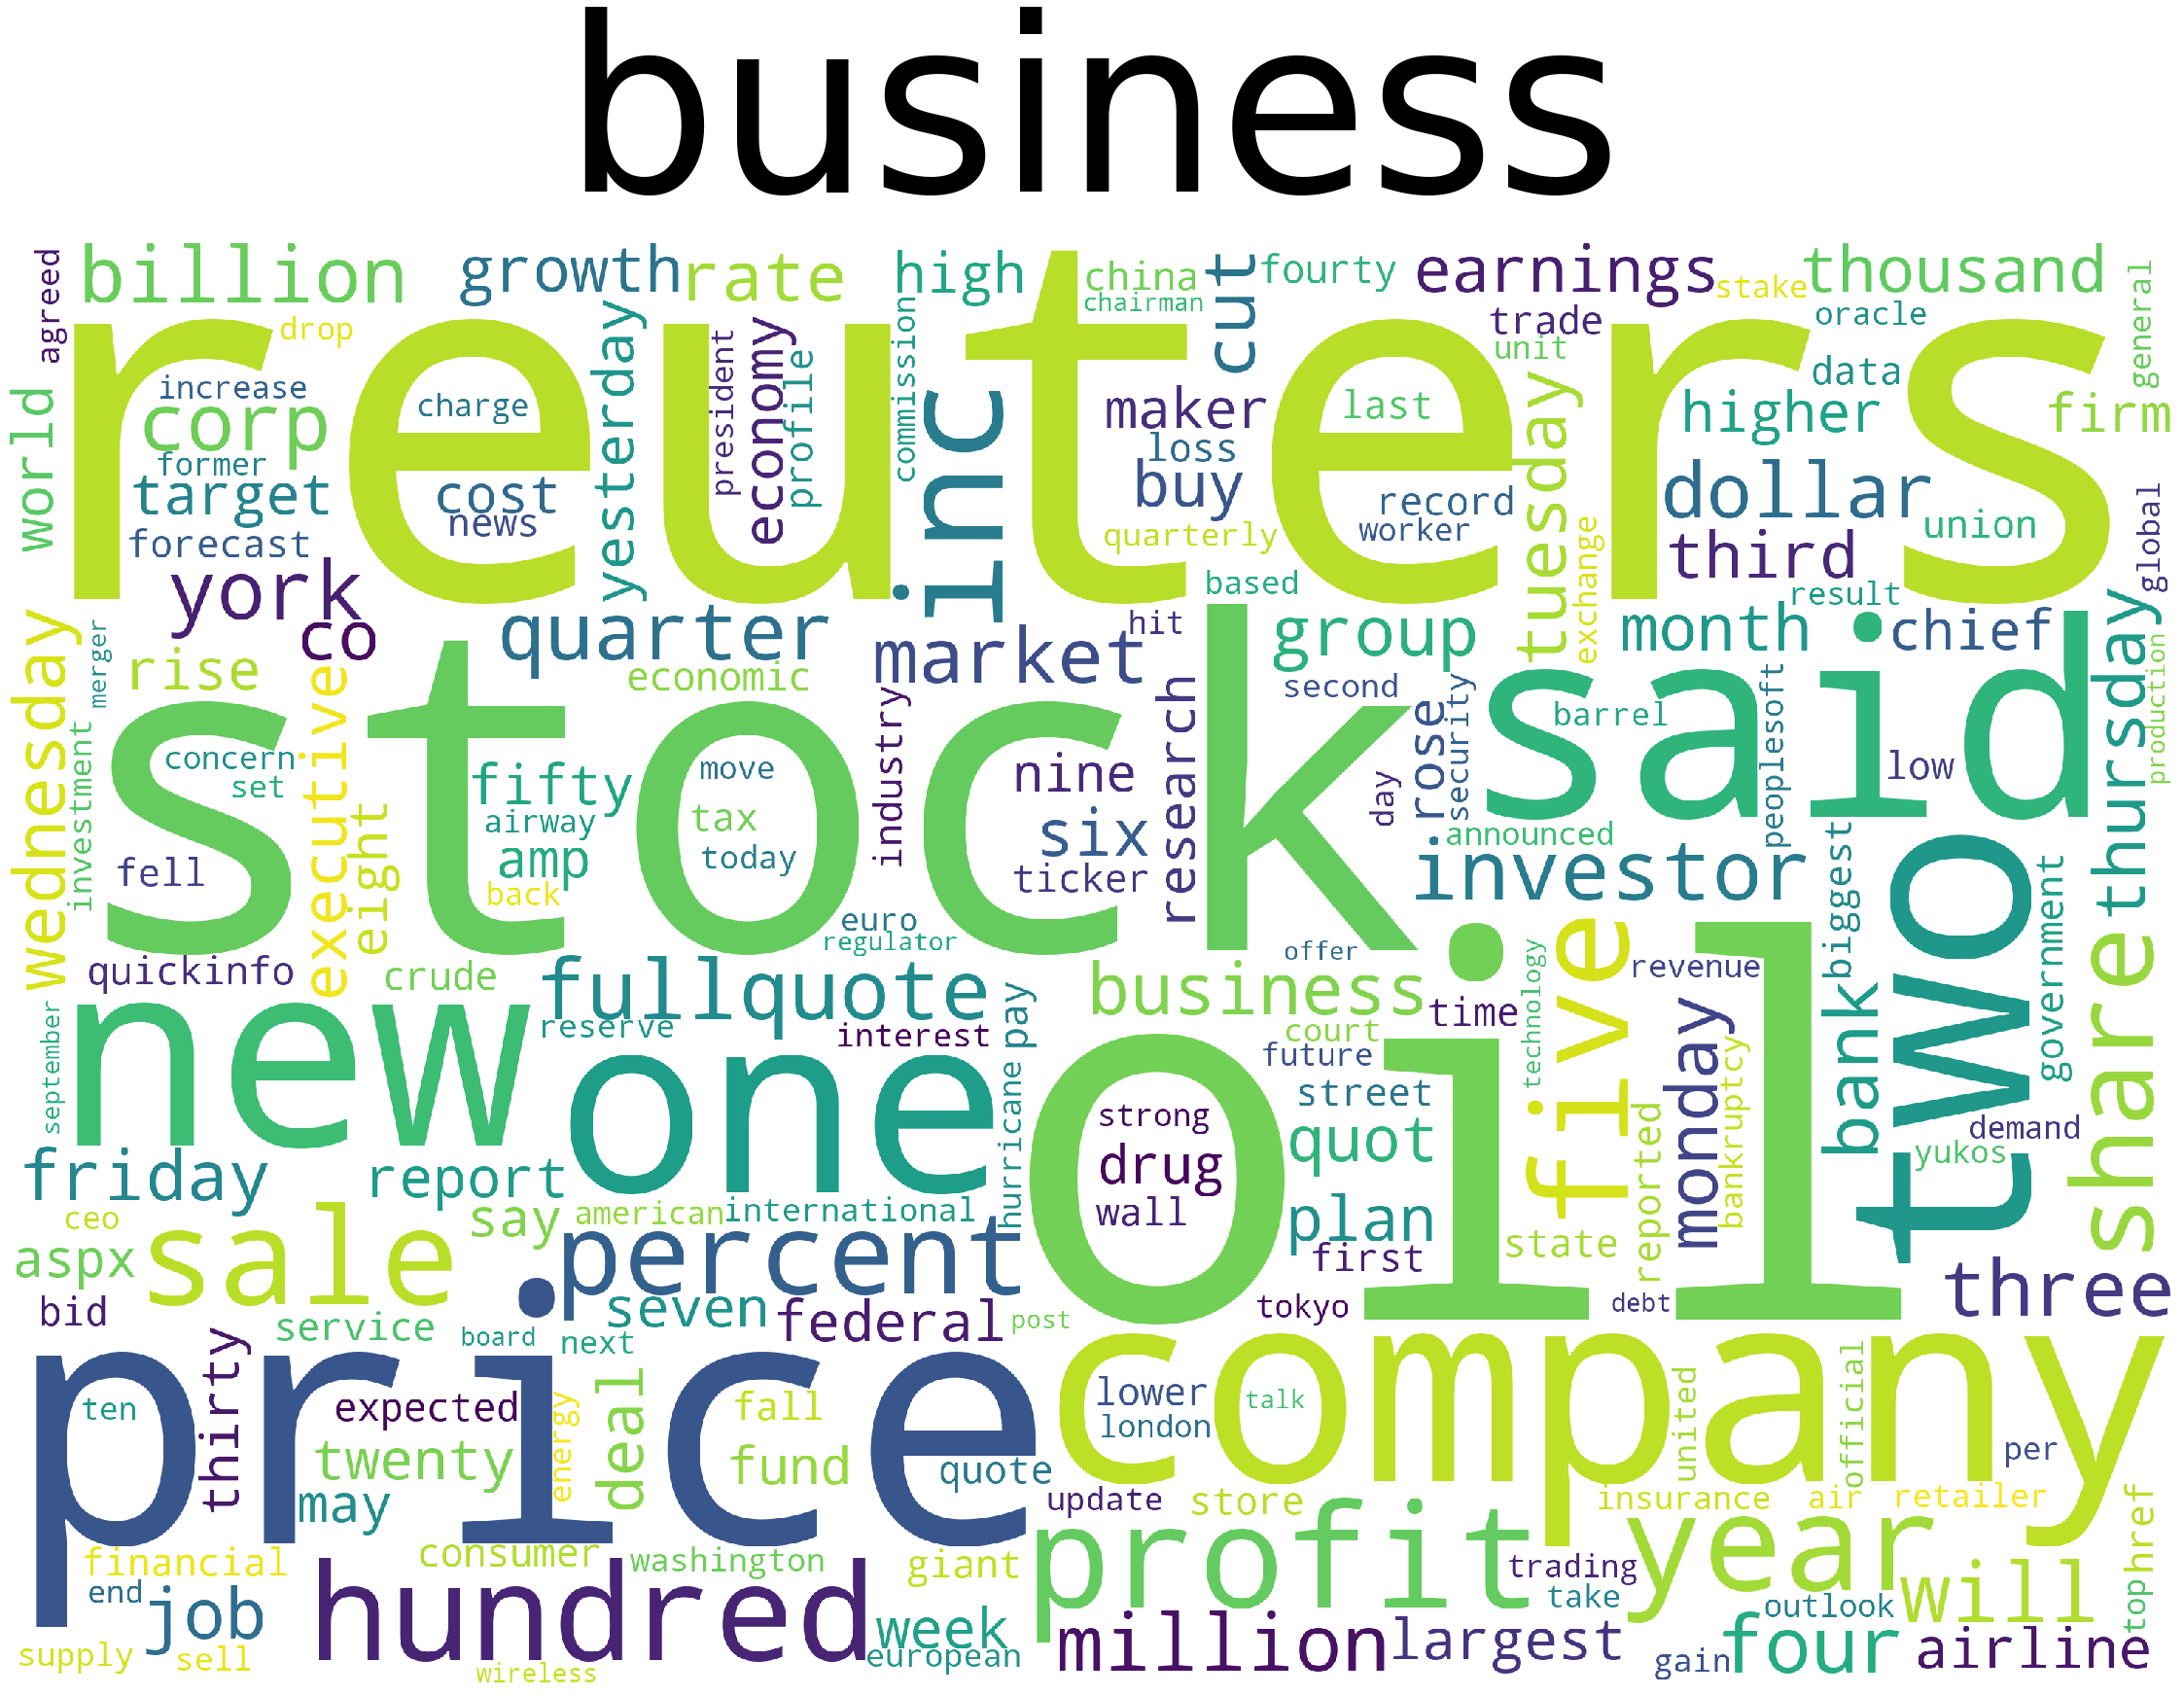

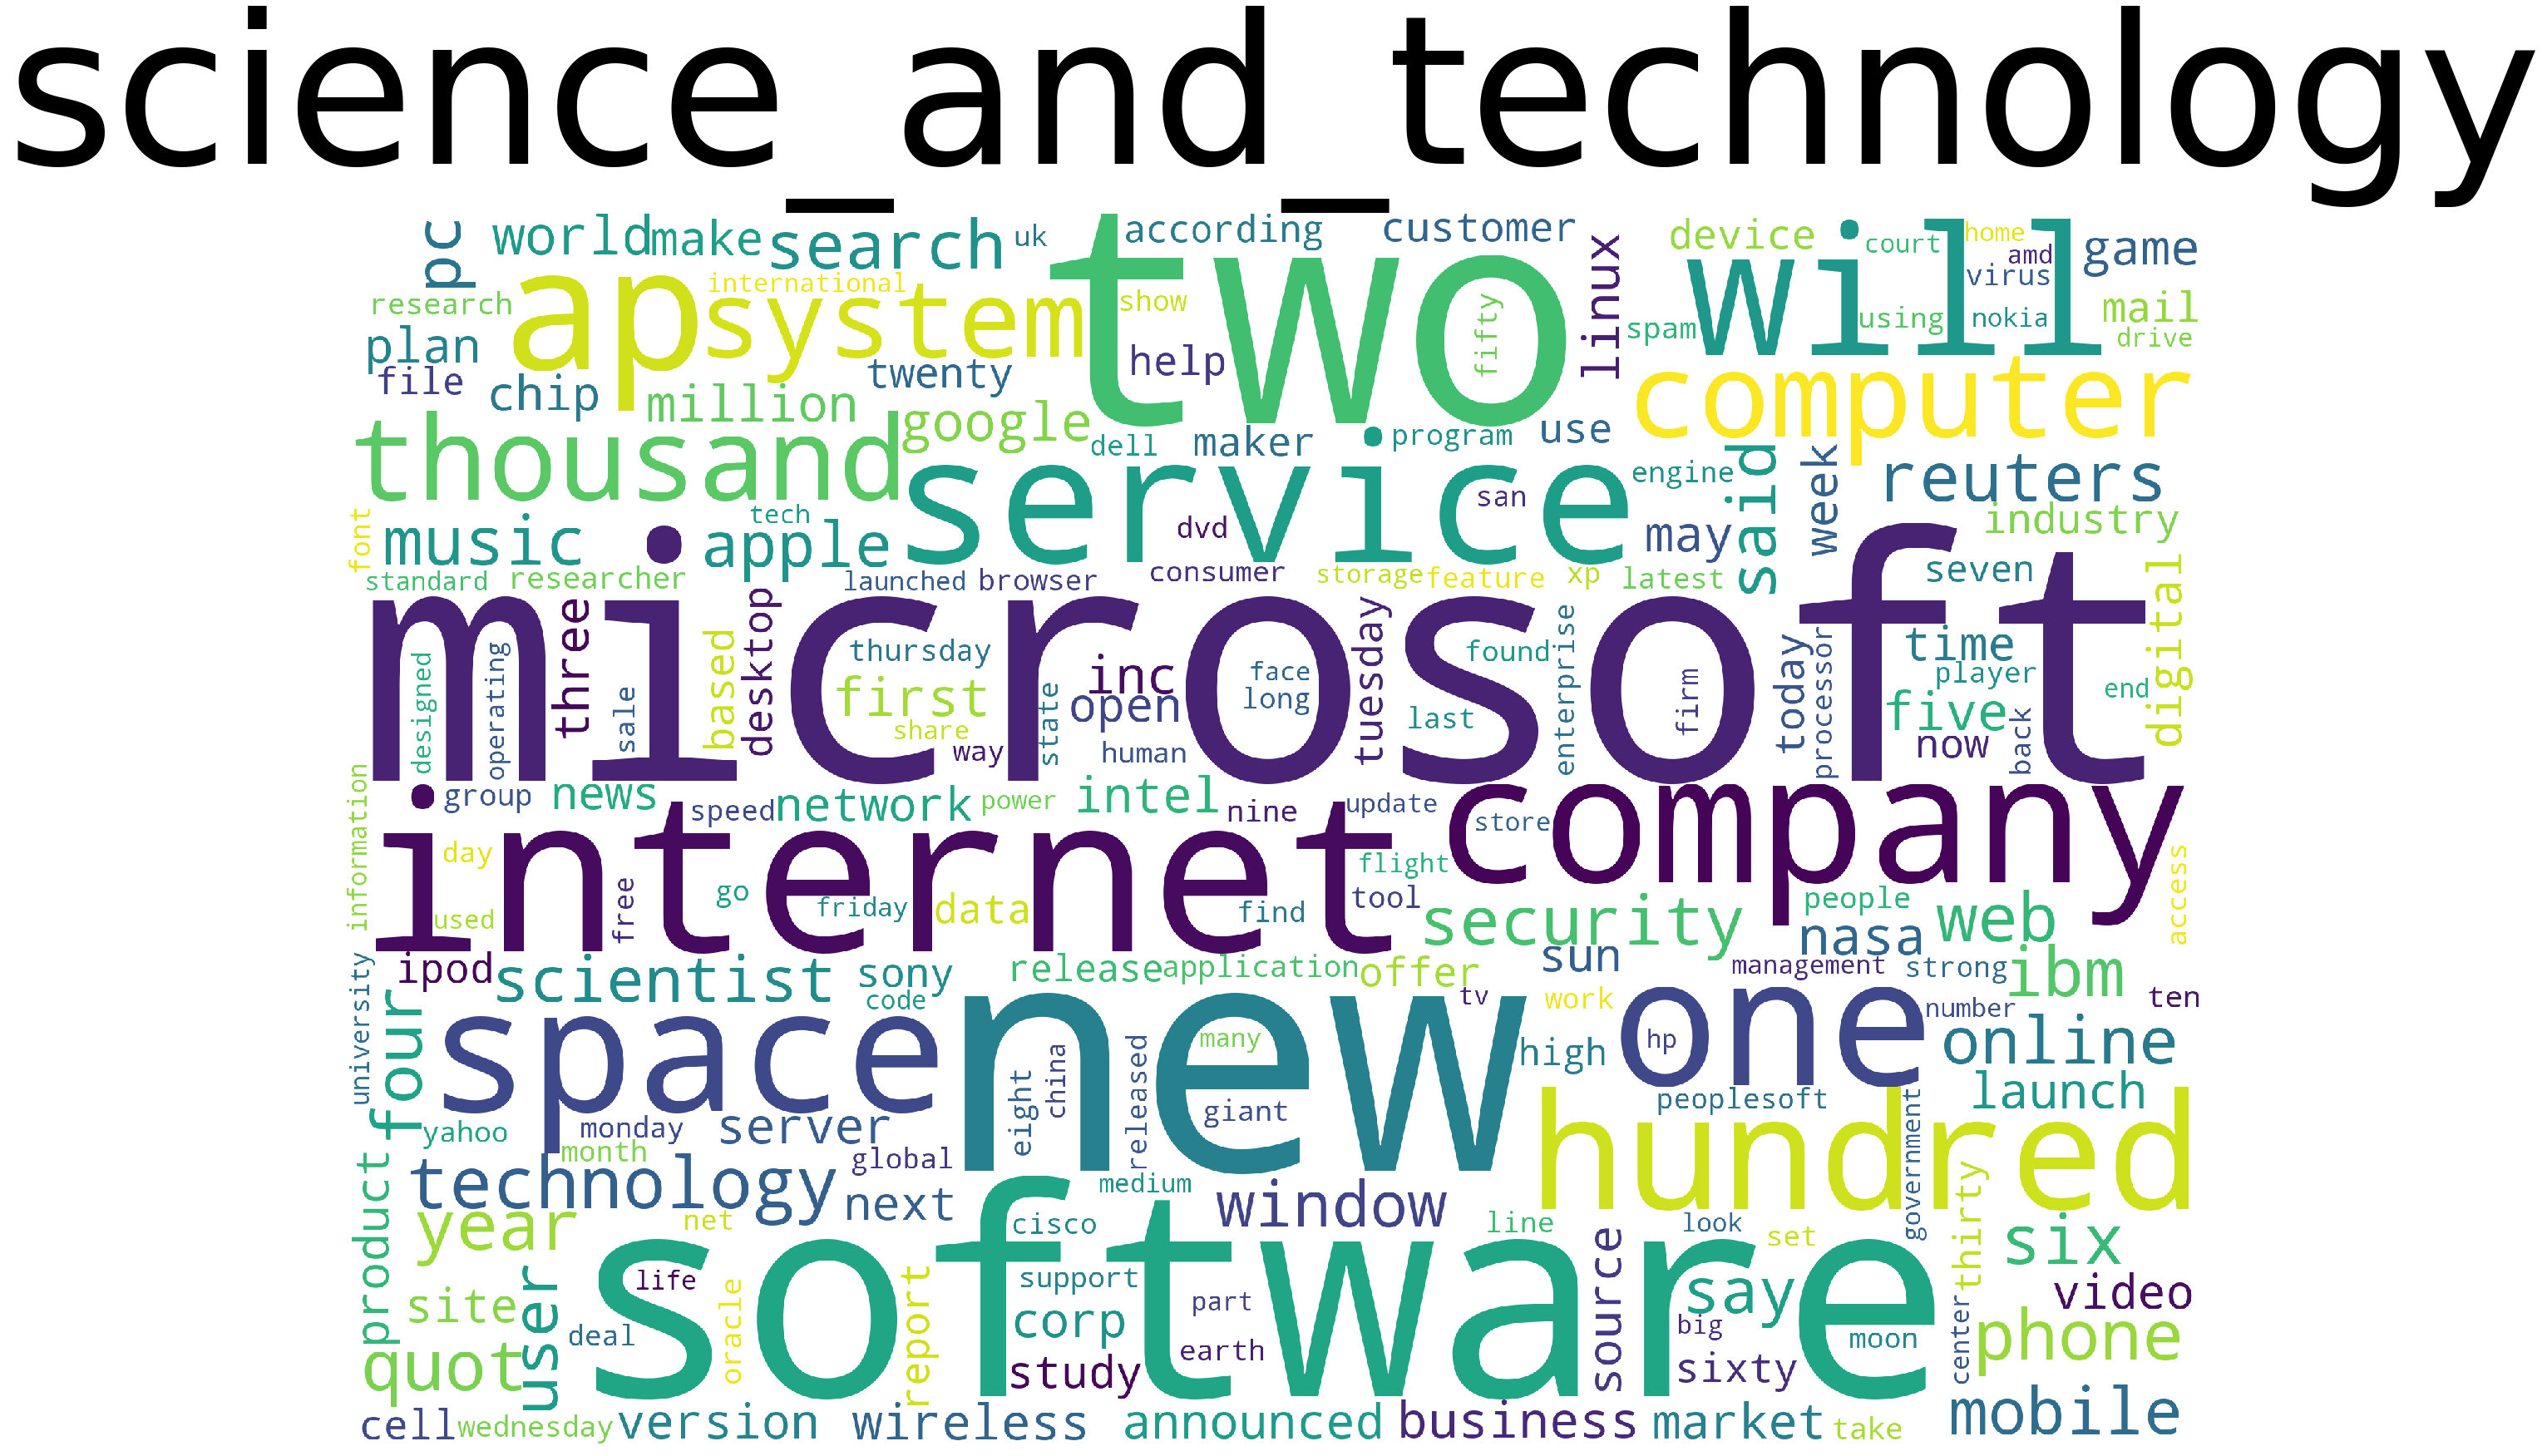

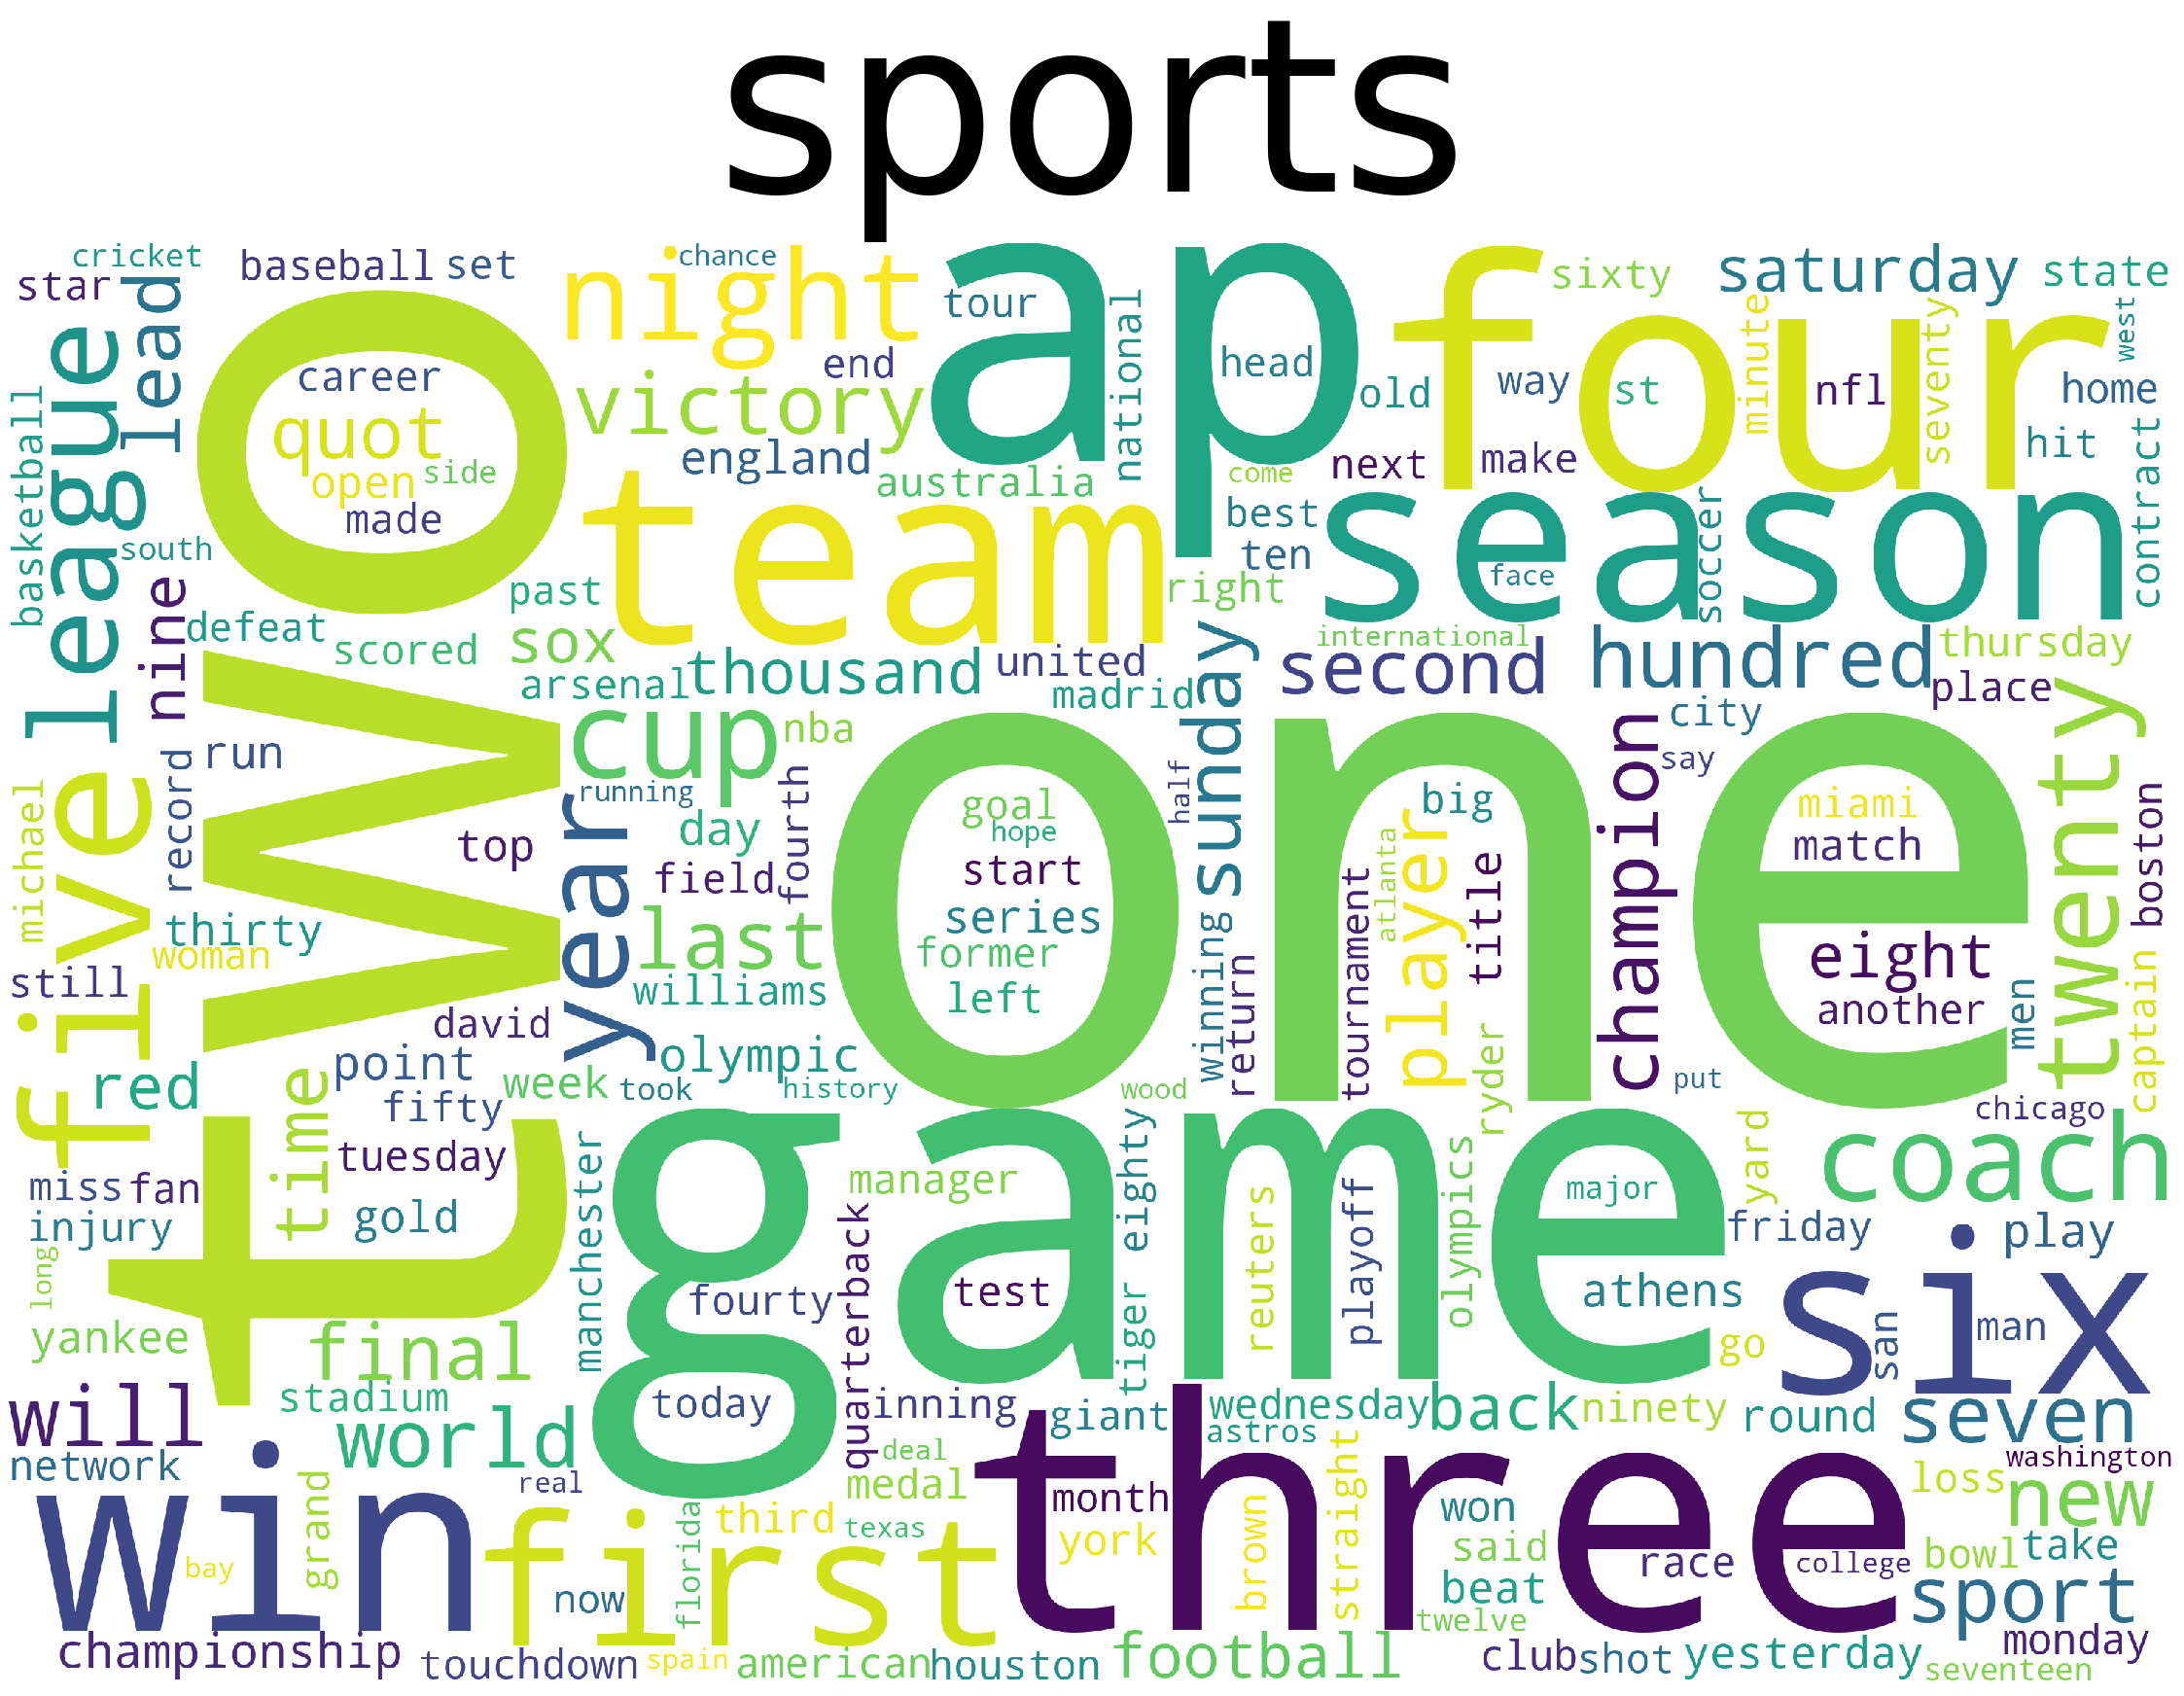

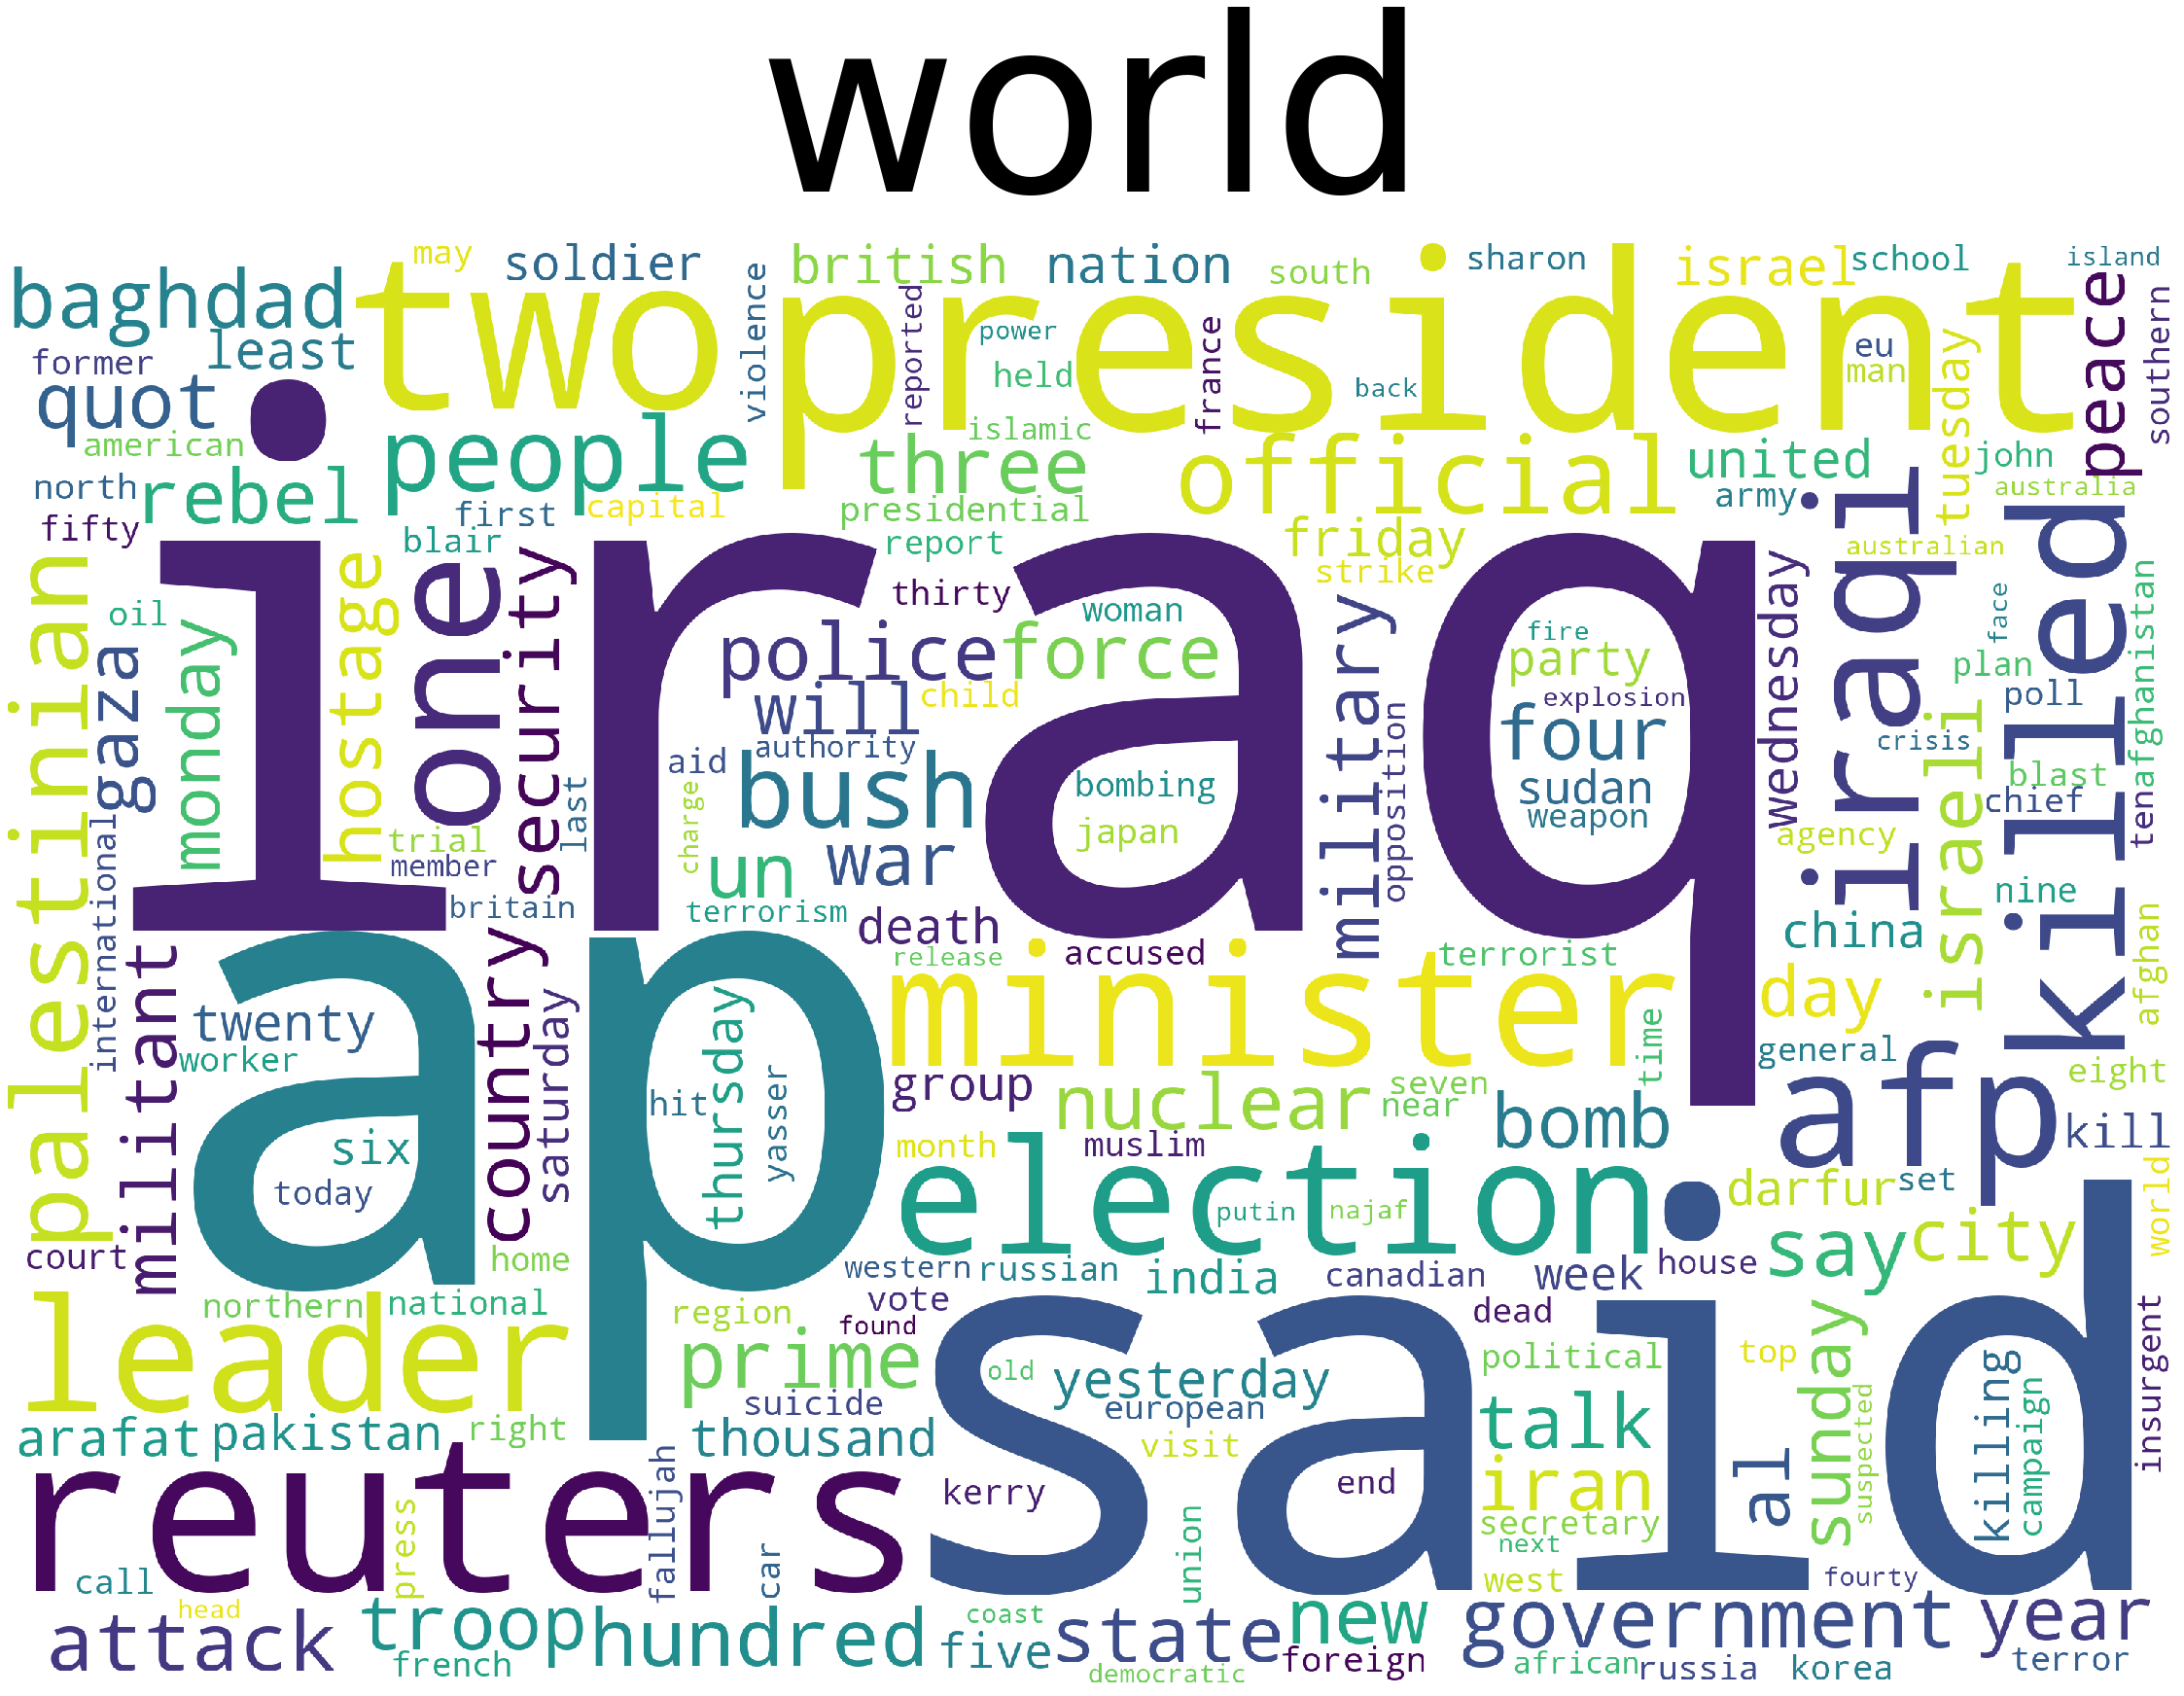

In [28]:
#create a word cloud for each news category and save as png
for category in news_categories:
    text = freq_by_cat[category]
    wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', collocations=False).generate_from_frequencies(text)
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off")
    plt.title(category, fontdict = title_dic)
    image_file_path = os.path.abspath(os.path.join(os.pardir,'images','{}_tfidf_word_cloud.png'.format(category)))
    plt.savefig(image_file_path, bbox_inches='tight')
    plt.show()

# TSNE

In [29]:
#sample 12000 for tsne
sample = tf_idf.sample(n=12000)
transform_me = sample.drop('News Category', axis=1)

In [30]:
#fit tsne model on sample data
tsne_model = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32, verbose = 1)
t = tsne_model.fit_transform(transform_me)

[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 12000 samples in 0.012s...
[t-SNE] Computed neighbors for 12000 samples in 9.901s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12000
[t-SNE] Computed conditional probabilities for sample 2000 / 12000
[t-SNE] Computed conditional probabilities for sample 3000 / 12000
[t-SNE] Computed conditional probabilities for sample 4000 / 12000
[t-SNE] Computed conditional probabilities for sample 5000 / 12000
[t-SNE] Computed conditional probabilities for sample 6000 / 12000
[t-SNE] Computed conditional probabilities for sample 7000 / 12000
[t-SNE] Computed conditional probabilities for sample 8000 / 12000
[t-SNE] Computed conditional probabilities for sample 9000 / 12000
[t-SNE] Computed conditional probabilities for sample 10000 / 12000
[t-SNE] Computed conditional probabilities for sample 11000 / 12000
[t-SNE] Computed conditional probabilities for sample 12000 / 12000
[t-SNE] Mean sigma: 0.349025
[t-SNE] KL divergence

In [31]:
#title dimension for pyplot
title_dic_tsne = {'fontsize': 50,
 'fontweight' : 5,
 'verticalalignment': 'baseline',
 'horizontalalignment': 'center'}

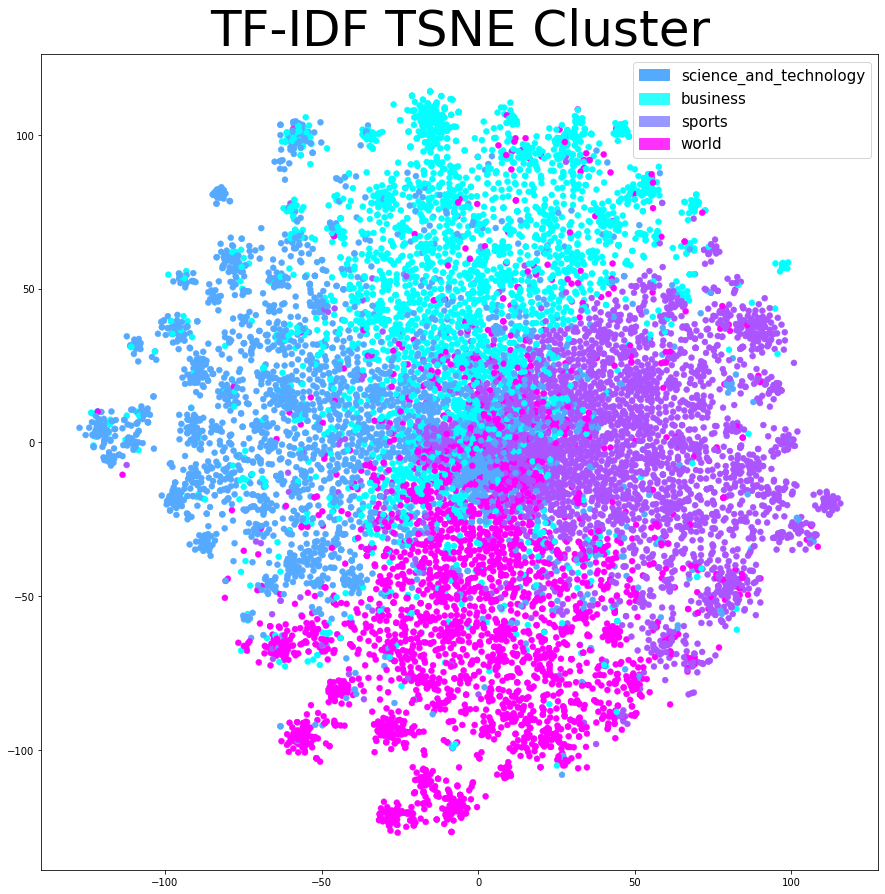

In [39]:
# teal 0  business
# blue 1 sci
# purple 2 sports
# pink 3 world

cat_colors = pd.Categorical(sample['News Category']).codes
sc = plt.scatter(t[:,0], t[:,1], c=cat_colors, cmap=cm.cool, linewidths=0.4)
snt_patch = Patch(color='#54AAFC', label='science_and_technology')
business_patch = Patch(color='#30ffff', label='business')
sports_patch = Patch(color='#9898FF', label='sports')
world_patch = Patch(color='#ff30ff', label='world')
plt.legend(handles=[snt_patch, business_patch, sports_patch, world_patch], fontsize = 15)
plt.gcf().set_size_inches((15, 15))
plt.title('TF-IDF TSNE Cluster', fontdict = title_dic_tsne)
image_file_path = os.path.abspath(os.path.join(os.pardir,'images','tfidf_tsne_cluster'))
plt.savefig(image_file_path, bbox_inches='tight')
plt.show()